# Getting cloudburst data  from 2000- 2020 with rainfall greater than 100 mm/hr

In [1]:
import xarray as xr

In [2]:
ds=xr.open_mfdataset(r"C:\Users\SONIKA\Desktop\Project Data\north_india_jaxa\north_india_jaxa\*.nc") #combining all daily(24 hrs) data files into a single dask array
ds

<xarray.Dataset>
Dimensions:  (time: 182664, lon: 90, lat: 90)
Coordinates:
  * time     (time) datetime64[ns] 2000-03-01 ... 2020-12-31T23:00:00
  * lon      (lon) float64 72.05 72.15 72.25 72.35 ... 80.65 80.75 80.85 80.95
  * lat      (lat) float64 36.95 36.85 36.75 36.65 ... 28.35 28.25 28.15 28.05
Data variables:
    pr       (time, lat, lon) float32 dask.array<chunksize=(24, 90, 90), meta=np.ndarray>
Attributes:
    CDI:          Climate Data Interface version 2.0.5 (https://mpimet.mpg.de...
    Conventions:  CF-1.6
    history:      Thu Sep 15 15:31:34 2022: cdo sellonlatbox,72,81,28,37 GSMa...
    CDO:          Climate Data Operators version 2.0.5 (https://mpimet.mpg.de...

In [3]:
ds= ds.where(ds.pr>=100,drop=True)        #finding the places where precipitation exceded 100mm and droping the values which are lower in cmbined dask array 
ds

<xarray.Dataset>
Dimensions:  (time: 806, lat: 90, lon: 90)
Coordinates:
  * time     (time) datetime64[ns] 2000-04-11T13:00:00 ... 2020-08-18T08:00:00
  * lon      (lon) float64 72.05 72.15 72.25 72.35 ... 80.65 80.75 80.85 80.95
  * lat      (lat) float64 36.95 36.85 36.75 36.65 ... 28.35 28.25 28.15 28.05
Data variables:
    pr       (time, lat, lon) float32 dask.array<chunksize=(1, 90, 90), meta=np.ndarray>
Attributes:
    CDI:          Climate Data Interface version 2.0.5 (https://mpimet.mpg.de...
    Conventions:  CF-1.6
    history:      Thu Sep 15 15:31:34 2022: cdo sellonlatbox,72,81,28,37 GSMa...
    CDO:          Climate Data Operators version 2.0.5 (https://mpimet.mpg.de...

In [4]:
ds.to_netcdf(r'C:\Users\SONIKA\Desktop\Cloudburst_unique_value\cloudburst.nc')  #converting cloudburst event's  dask array into netcdf

# Finding of the no. of count (no. of times) a cloudburst happened in all locations during 2000 to 2020

In [5]:
ds=xr.open_dataset(r'C:\Users\SONIKA\Desktop\Cloudburst_unique_value\cloudburst.nc') #opening the above created netdf file again
ds

<xarray.Dataset>
Dimensions:  (time: 806, lat: 90, lon: 90)
Coordinates:
  * time     (time) datetime64[ns] 2000-04-11T13:00:00 ... 2020-08-18T08:00:00
  * lon      (lon) float64 72.05 72.15 72.25 72.35 ... 80.65 80.75 80.85 80.95
  * lat      (lat) float64 36.95 36.85 36.75 36.65 ... 28.35 28.25 28.15 28.05
Data variables:
    pr       (time, lat, lon) float32 ...
Attributes:
    CDI:          Climate Data Interface version 2.0.5 (https://mpimet.mpg.de...
    Conventions:  CF-1.6
    history:      Thu Sep 15 15:31:34 2022: cdo sellonlatbox,72,81,28,37 GSMa...
    CDO:          Climate Data Operators version 2.0.5 (https://mpimet.mpg.de...

In [6]:
ds= ds.pr.count(dim='time')       #finding of the no. of count (no. of times) a cloudburst happened in all locations during 2000 to 2020
ds

<xarray.DataArray 'pr' (lat: 90, lon: 90)>
array([[0, 0, 0, ..., 2, 1, 1],
       [0, 0, 0, ..., 1, 1, 1],
       [0, 0, 0, ..., 2, 2, 2],
       ...,
       [0, 0, 0, ..., 4, 6, 7],
       [0, 0, 0, ..., 6, 5, 7],
       [0, 1, 1, ..., 8, 5, 6]])
Coordinates:
  * lon      (lon) float64 72.05 72.15 72.25 72.35 ... 80.65 80.75 80.85 80.95
  * lat      (lat) float64 36.95 36.85 36.75 36.65 ... 28.35 28.25 28.15 28.05

In [7]:
ds.to_netcdf(r'C:\Users\SONIKA\Desktop\Cloudburst_unique_value\unique_cloudburst.nc')  #converting above file into netcdf 

In [8]:
ds= xr.open_dataset(r'C:\Users\SONIKA\Desktop\Cloudburst_unique_value\unique_cloudburst.nc') #opening the file having counts of no. of cloudburst in all locations 
ds

<xarray.Dataset>
Dimensions:  (lon: 90, lat: 90)
Coordinates:
  * lon      (lon) float64 72.05 72.15 72.25 72.35 ... 80.65 80.75 80.85 80.95
  * lat      (lat) float64 36.95 36.85 36.75 36.65 ... 28.35 28.25 28.15 28.05
Data variables:
    pr       (lat, lon) int32 ...

## Plotting counts of no. of cloudburst in all locations 

In [9]:
import numpy
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
from matplotlib.cm import get_cmap

In [10]:
lat= ds.lat[:]
lon =ds.lon[:]
pr=ds.pr[:,:]

In [11]:
mp = Basemap(projection = 'merc', 
             llcrnrlon = 70,
             llcrnrlat = 27,
             urcrnrlon = 82,
             urcrnrlat = 37, 
             resolution = 'i')

lon, lat = np.meshgrid(lon, lat)
x,y = mp(lon, lat)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

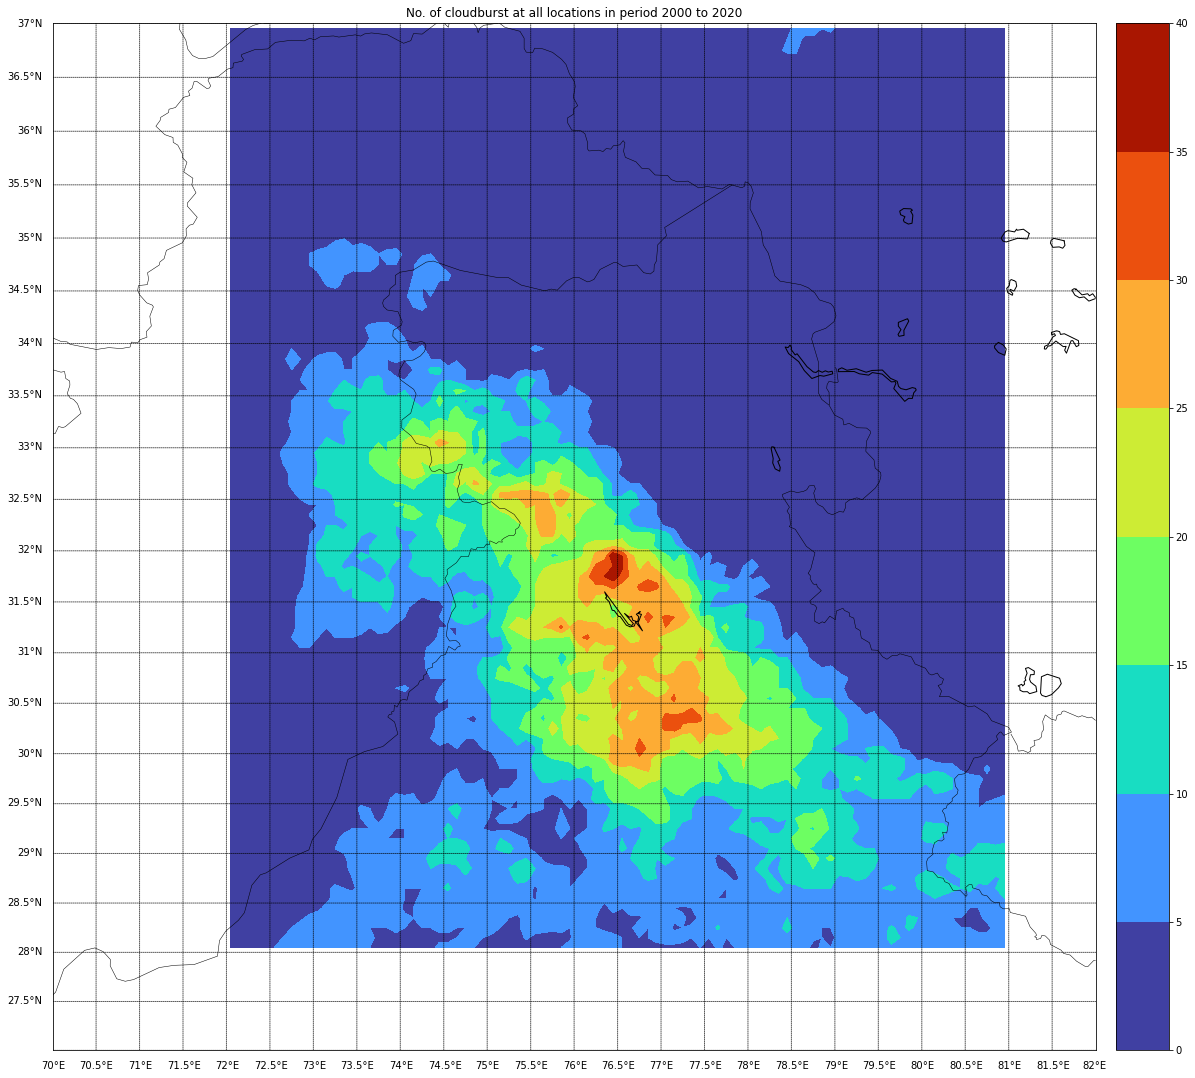

In [12]:
plt.figure(figsize=(20,20))
mp.drawcoastlines()
mp.drawstates()
mp.drawcountries()
mp.drawparallels(np.arange(-180,180,.5),labels=[True,False,False,False])
mp.drawmeridians(np.arange(-90,90,.5),labels=[0,0,0,1])
cs=mp.contourf(x, y, pr,cmap='turbo')
cbar = mp.colorbar(cs)
plt.title('No. of cloudburst at all locations in period 2000 to 2020')
plt.savefig(r'C:\Users\SONIKA\Desktop\Cloudburst_unique_value\No._of_cloudburst_at_all_locations.jpg')

# Finding unique places of cloudburst during 2000 -2020

In [13]:
ds= ds.where(ds.pr==1,drop=True)      #filtering unique cloudburst counts from  total count of no. of cloudburst in all locations 
ds 

<xarray.Dataset>
Dimensions:  (lat: 88, lon: 90)
Coordinates:
  * lon      (lon) float64 72.05 72.15 72.25 72.35 ... 80.65 80.75 80.85 80.95
  * lat      (lat) float64 36.95 36.85 36.75 36.65 ... 28.55 28.25 28.15 28.05
Data variables:
    pr       (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan

In [14]:
lat= ds.lat[:]
lon =ds.lon[:]
pr=ds.pr[:,:]

In [15]:
mp = Basemap(projection = 'merc', 
             llcrnrlon = 70,
             llcrnrlat = 27,
             urcrnrlon = 82,
             urcrnrlat = 37, 
             resolution = 'i')

lon, lat = np.meshgrid(lon, lat)
x,y = mp(lon, lat)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

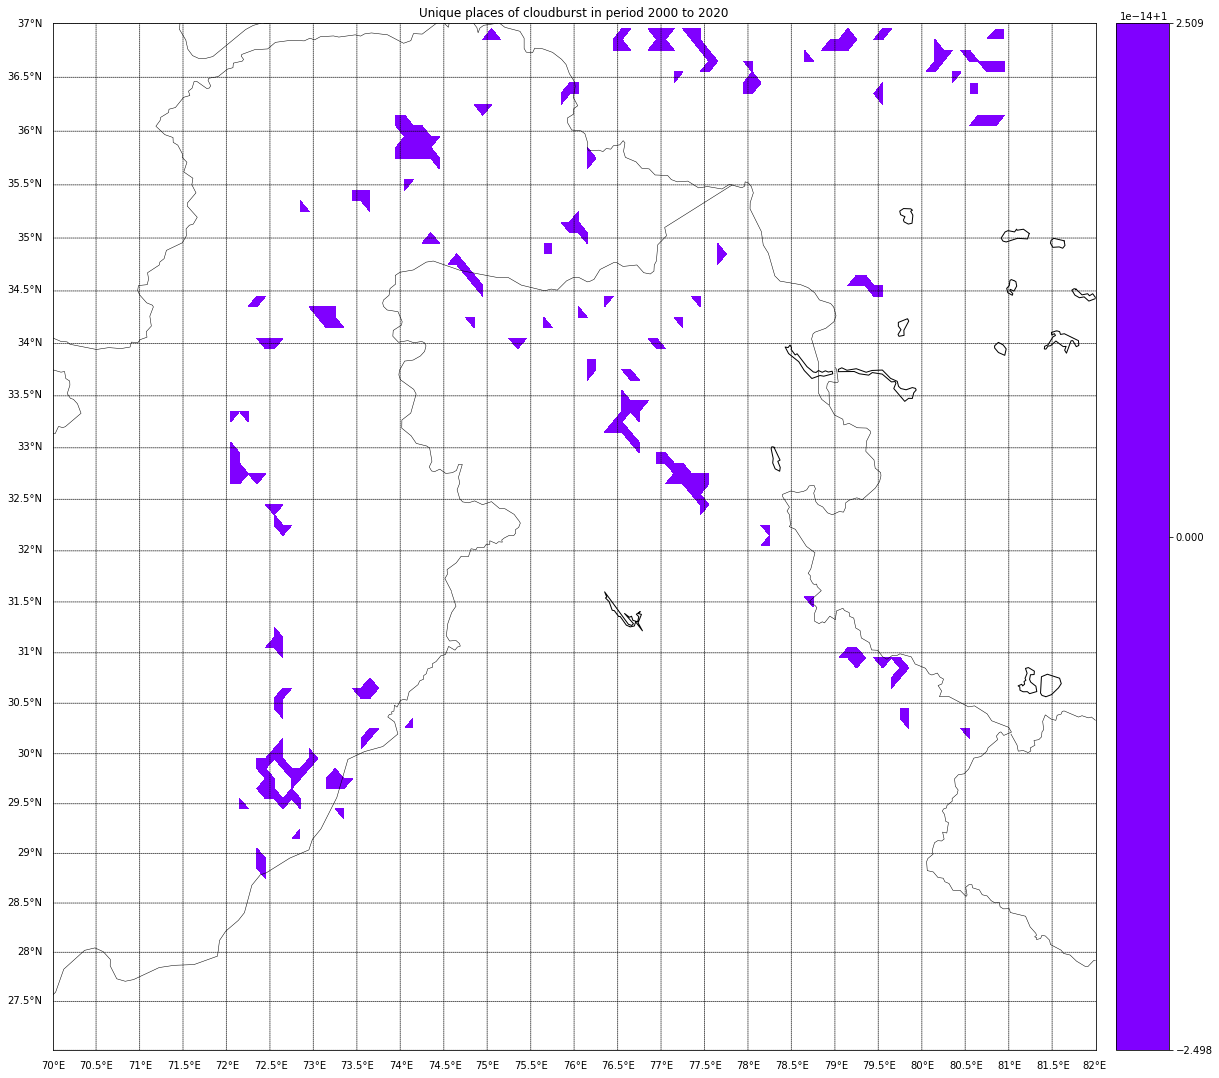

In [16]:
plt.figure(figsize=(20,20))
mp.drawcoastlines()
mp.drawstates()
mp.drawcountries()
mp.drawparallels(np.arange(-180,180,.5),labels=[True,False,False,False])
mp.drawmeridians(np.arange(-90,90,.5),labels=[0,0,0,1])
cs=mp.contourf(x, y, pr,cmap='rainbow',vmax=1,vmin=1)
cbar = mp.colorbar(cs)
plt.title('Unique places of cloudburst in period 2000 to 2020')
plt.savefig(r'C:\Users\SONIKA\Desktop\Cloudburst_unique_value\Unique_places_of_cloudburts.jpg')

In [17]:
ds=ds.to_dataframe().dropna()    #converting unique cloudburst count data into dataframe
ds

pr
lat   lon       
36.95 75.05  1.0
      75.25  1.0
      76.25  1.0
      76.35  1.0
      76.55  1.0
...          ...
28.05 72.15  1.0
      72.25  1.0
      75.25  1.0
      75.35  1.0
      75.45  1.0

[630 rows x 1 columns]

In [18]:
ds.to_excel(r'C:\Users\SONIKA\Desktop\Cloudburst_unique_value\unique_cloudburst.xlsx') #saving unique cloudburst count data into excel file